<font size="10"> **DSCI project Jun(Yeon Jun) Ahn**</font>

<font size="5"> **Introduction**</font>

This project aims to determine whether patients can be classified correctly for potential heart disease based on their health condition.


High cholesterol creates deposits in the blood vessels, potentially leading to heart disease(Mayo Clinic, 2023). Insulin resistance is when organs cannot absorb sugar from the blood, causing people to have high blood sugar levels. If sugar is not absorbed, the arteries become harder and cause high blood pressure, leading to heart disease (Cleveland Clinic, 2021). Therefore, people with high blood pressure are more prone to have heart disease.


Using the heart disease data - Cleveland, a new patient's potential heart disease(num) can be predicted via their cholesterol, resting blood pressure and maximum heart rate.


In [1]:
library(tidyverse)
library(tidymodels)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
url<-"https://raw.githubusercontent.com/junahn09/project/main/data/heart_disease/processed.cleveland.data" # dataset read in csv in R and assigning columns names.

cleveland_data<-read_csv(url, col_names=c("age","sex","cp","trestbps","chol", "fbs", "restecg",
                                          "thalach", "exang","oldpeak","slope","ca","thal","num"))|> 
                         mutate(sex = as_factor(sex))|>
mutate(cp = as_factor(cp))|>
mutate(fbs = as_factor(fbs))|>
mutate( restecg= as_factor(restecg))|>
mutate(exang=as_factor(exang))|>
mutate(slope = as_factor(slope))|>
mutate(thal=as_factor(thal))# usage of as_factor to change the type of each column (wrangling).


cleaned_data <- cleveland_data|> # getting rid of all the values with "?"
filter(!ca == '?')|>
filter(!cp == '?')|>
filter(!trestbps == '?')|>
filter(!chol == '?')|>
filter(!fbs == '?')|>
filter(!restecg == '?')|>
filter(!thalach == '?')|> 
filter(!exang == '?')|>
filter(!oldpeak == '?')|>
filter(!slope == '?')|>
filter(!num == '?')|>
filter(!thal =='?')
cleaned_data

tidy_data<-cleaned_data|> #tidy data by selecting desired columns and arranging it in descending order of thalach column.
select (trestbps, chol, thalach, num)|>
arrange(desc(thalach))
tidy_data


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<chr>,<fct>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


trestbps,chol,thalach,num
<dbl>,<dbl>,<dbl>,<dbl>
130,204,202,0
192,283,195,1
120,240,194,0
118,210,192,0
118,186,190,0
130,219,188,0
130,250,187,0
122,222,186,0
140,261,186,0


In [3]:
set.seed(2024) #spliting selected data from above to training (75%) and testing (25%) and getting glimpse for training and testing datas. 

split_data<-initial_split(tidy_data, prop = 0.75, strata=num)
heart_training<-training(split_data)
heart_testing<-testing(split_data)

glimpse(heart_training)

glimpse(heart_testing)


Rows: 220
Columns: 4
$ trestbps <dbl> 130, 120, 118, 130, 130, 140, 128, 140, 138, 138, 120, 130, 1…
$ chol     <dbl> 204, 240, 210, 219, 250, 261, 205, 321, 183, 271, 157, 245, 2…
$ thalach  <dbl> 202, 194, 192, 188, 187, 186, 184, 182, 182, 182, 182, 180, 1…
$ num      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
Rows: 77
Columns: 4
$ trestbps <dbl> 118, 122, 115, 120, 115, 140, 120, 140, 130, 105, 152, 120, 1…
$ chol     <dbl> 186, 222, 260, 231, 303, 235, 236, 226, 204, 204, 277, 215, 1…
$ thalach  <dbl> 190, 186, 185, 182, 181, 180, 178, 178, 172, 172, 172, 170, 1…
$ num      <dbl> 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0…


In [4]:
heart_training_summary<-heart_training|> # creating a summarized table of selected columns grouped by num and fbs
group_by(num)|>
summarize(max_chol=max(chol), min_chol=min(chol), avg_chol=mean(chol),
          max_trestbps=max(trestbps), min_trestbps=min(trestbps), avg_trestbps=mean(trestbps),
         max_thalach=max(thalach), min_thalach=min(thalach), avg_thalach=mean(thalach))
    

heart_training_summary

num,max_chol,min_chol,avg_chol,max_trestbps,min_trestbps,avg_trestbps,max_thalach,min_thalach,avg_thalach
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,564,126,244.9831,180,94,129.6695,202,105,159.8729
1,330,149,248.2250,192,108,134.7500,195,99,149.7750
2,409,169,261.2692,170,100,132.6154,170,97,135.9615
3,353,164,245.8400,178,100,132.3200,173,90,131.6800
4,407,166,252.1818,160,112,138.0909,165,114,138.3636


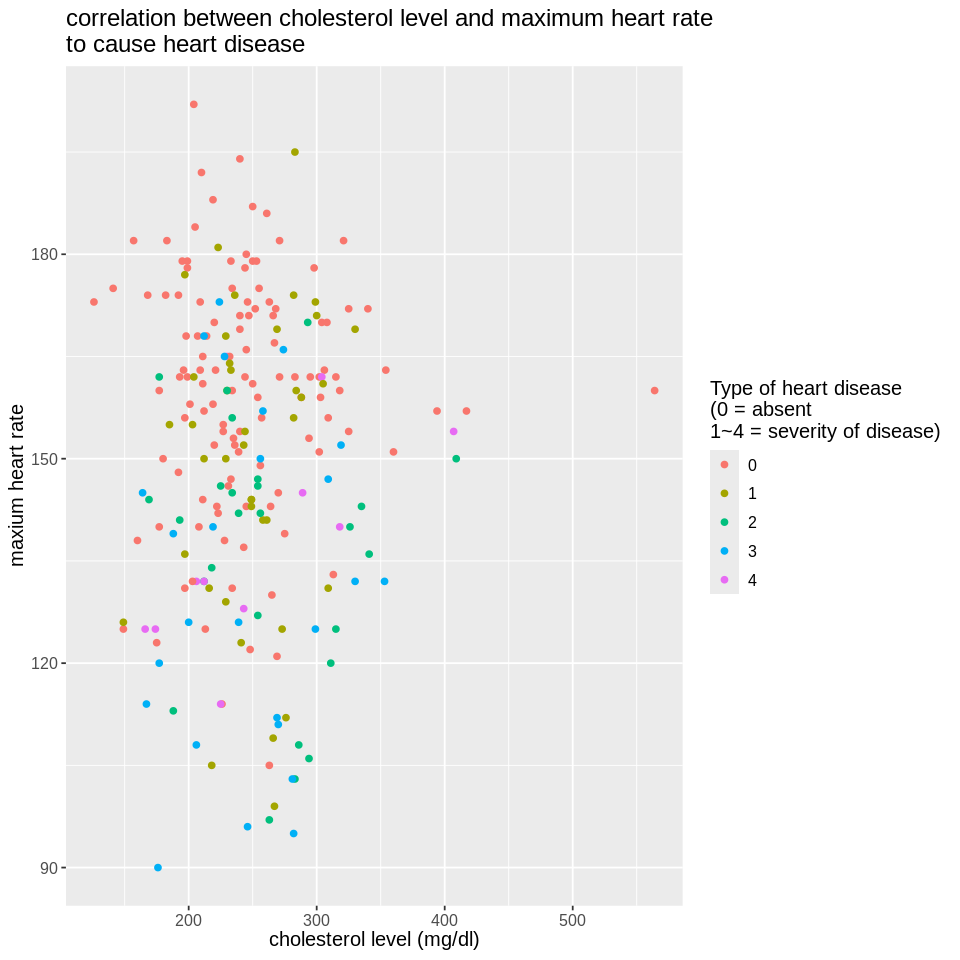

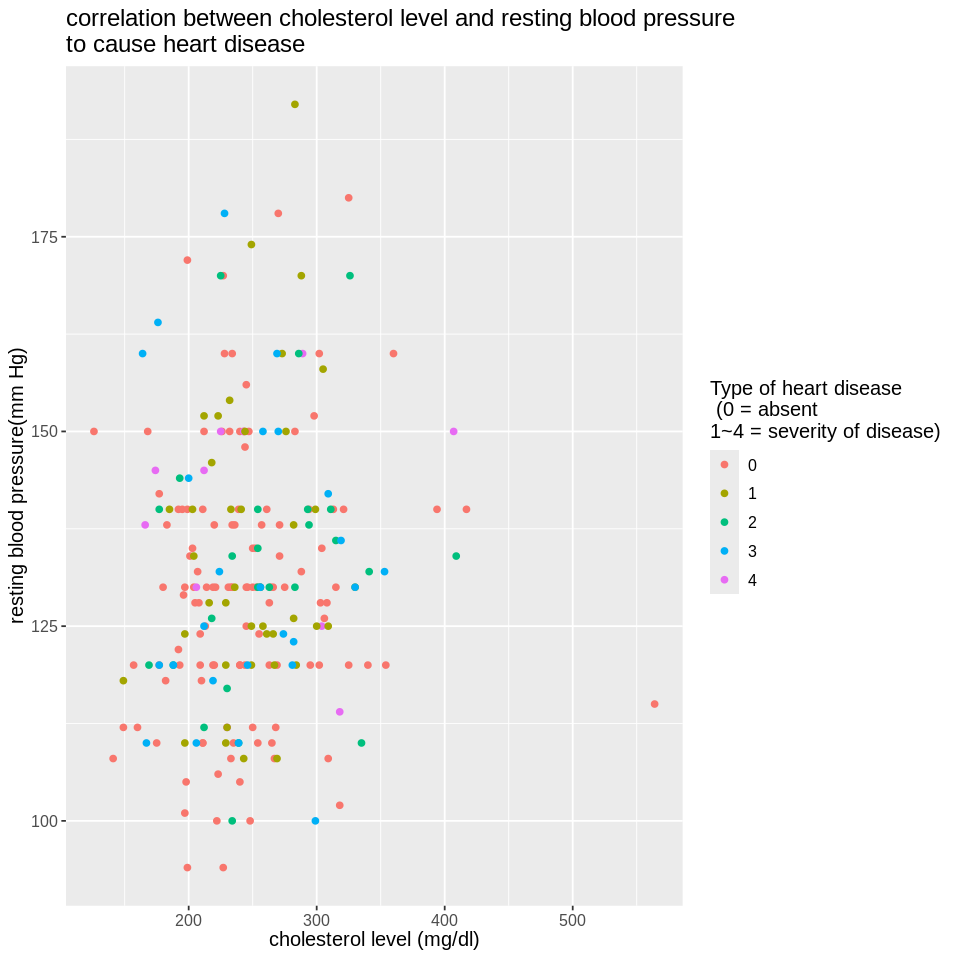

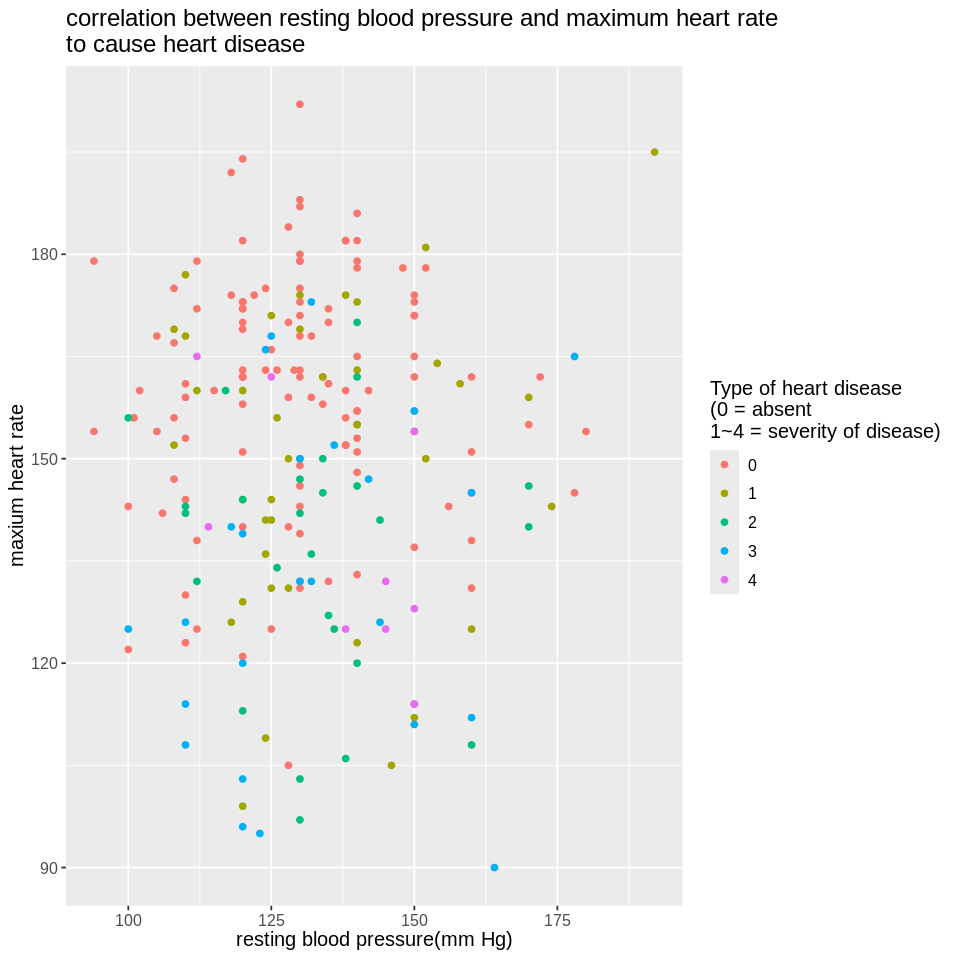

In [5]:
#visualization of data between chol, thalach, and trestbps in scatterplot.

options(repr.plot.width = 8, repr.plot.height = 8)

chol_vs_thalach_plot<-heart_training|>
ggplot(aes(x= chol, y = thalach, colour = num))+
geom_point(aes(colour=factor(num)))+
labs(x = "cholesterol level (mg/dl)", y = "maxium heart rate", 
     title = "correlation between cholesterol level and maximum heart rate \nto cause heart disease",
    colour = "Type of heart disease\n(0 = absent \n1~4 = severity of disease)")+
theme(text=element_text(size=12))

chol_vs_thalach_plot

chol_vs_trestbps_plot<-heart_training|>
ggplot(aes(x = chol, y = trestbps, colour = num))+
geom_point(aes(colour=factor(num)))+
           labs(x = "cholesterol level (mg/dl)", y = "resting blood pressure(mm Hg)", 
     title = "correlation between cholesterol level and resting blood pressure \nto cause heart disease",
    colour = "Type of heart disease\n (0 = absent \n1~4 = severity of disease)")+
           theme(text=element_text(size=12))
chol_vs_trestbps_plot


trestbps_vs_thalach_plot<-heart_training|>
ggplot(aes(x = trestbps, y = thalach, colour = num))+
geom_point(aes(colour=factor(num)))+
           labs(x = "resting blood pressure(mm Hg)", y = "maxium heart rate", 
     title = "correlation between resting blood pressure and maximum heart rate \nto cause heart disease",
    colour = "Type of heart disease\n(0 = absent \n1~4 = severity of disease)")+
           theme(text=element_text(size=12))
trestbps_vs_thalach_plot



<font size="6"> **Methods**</font>

The Heart Disease databases are from https://archive.ics.uci.edu/dataset/45/heart+disease (Janosi, A. et al. 1988).  
The data collected are from 4 locations: Cleveland, Hungary, Switzerland, and VA Long Beach.

For this particular project, a data frame from Cleveland was chosen. 

The data frames consist of the patient's health record separated into 14 different columns:  

1.**age**  
2.**sex**: 0 = female, 1 = male  
3.**chest pain type(cp)**: 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic  
4.**resting blood pressure (trestbps)**: in mmHg  
5.**serum cholesterol(chol)**: in mg/dl  
6.**fasting blood sugar > 120 mg/dl (fbs)**: (0 = False, 1 = True)  
7.**resting electrocardiographic results(restecg)**: (0 = normal,1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)  
8.**maximum heart rate achieved(thalach)**: BPM  
9.**exercise-induced angina(exang)**: (0 = no, 1 = yes)  
10.**oldpeak**: ST depression induced by exercise relative to rest  
11.**slope**: the slope of the peak exercise ST segment, 1 = upsloping, 2 = flat, 3 = downsloping  
12.**ca**: number of major vessels(0~3) coloured by florosopy  
13.**thal**   
14.**num**: diagnosis of heart disease; 0 = no presence 1 ~ 4 = severity  

Using library function, tidyverse and tidymodels were installed in R to load, clean, wrangle, visualize, and classify.  

First the data from the Internet was converted using its web address, https://archive.ics.uci.edu/dataset/45/heart+disease, and saved as a URL. Then, the URL was read in R using the read_csv function and the column names above were assigned to their corresponding values. Some variable types were changed according to the information on the website. Using mutate and as_factor functions from dbl to fct, as some variables had numerical values to represent categorical values to avoid confusion when calculating and visualizing. 

Then, the values were found as '?' and eliminated using the filter function to clean the data frame. This resulted in 297 observations and 14 variables in the data frame. 

To tidy the data, the select and arrange functions were used to select only the 'num', 'thalach', 'trestbps', and chol columns, organizing them in descending order of 'thalach': 297 observations and 4 variables. These variables were selected because each value was specific to each patient's health condition. Since there are standardized ranges of a healthy person's maximum heart rate, resting heart rate, and cholesterol level, these variables were chosen to predict the potential of having heart disease.  

The set.seed function was used for reproducible analysis, with a value of 2024. Then, the data was separated into training and testing data via the initial_split function(75% training and 25% testing), followed by training and testing functions. 

Then, it was summarized into a table. The table grouped the data using the group_by function via 'num' and the summarize function to collect the rest of the selected columns' maximum, minimum, and average values. 

The scatter plot was chosen to visualize as all the selected variables represented numerical values corresponding to each observation(patients). The ggplot function assigned each axis between maximum heart rate(thalach), resting heart rate(restbps), and cholesterol(chol). Using aesthetic function in ggplot, different colours represented different values of 'num'. 

For R to graph scatter plot, the geom_point function was used for all three thalach vs. restbps, thalach vs. chol, and restbps vs. chol. The scatter plot's aesthetic was assigned via 'aes(colour=factor(num)' to match the ggplot.

The tittle, name of axis, and legend title were assigned via labs function.










<font size="6"> **Expected outcomes and significance**</font>


A person with heart disease is expected to have significantly higher or lower values in cholesterol and maximum and resting heart rate, as this would indicate malfunction. 

Using other patients' data to create a predictive program for potential heart disease could delay or prevent the disease. This may prolong human life expectancy by being proactive and giving pharmaceutical companies a chance to develop suitable medicines at an early stage. 

Perhaps in the future, people can question whether any other factors in life contribute to heart disease or are there any relation between diet, origin, race, smoking status, etc.  

<font size="6"> **Reference**</font>

1. Mayo Clinic (2023). High Cholesterol - Symptoms and Causes. https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/symptoms-causes/syc-20350800.
2. Cleveland Clinic (2021). Insulin Resistance. https://my.clevelandclinic.org/health/diseases/22206-insulin-resistance.
3. Janosi, A., Steinbrunn, W, Pfisterer, M., and Detrano. R. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.
 
